In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import h5py
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.constraints import MaxNorm

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


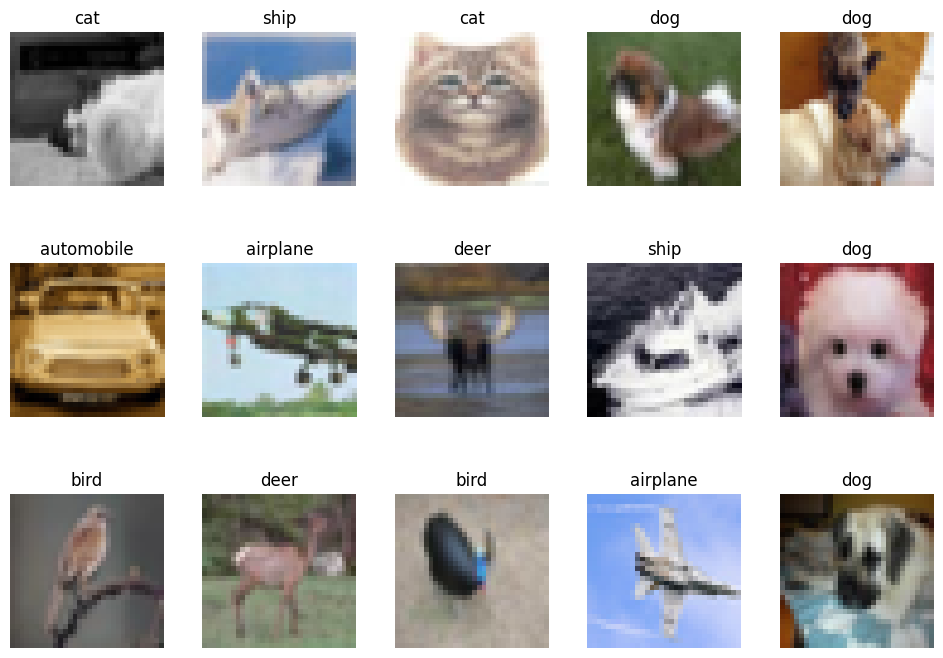

In [3]:
# Assuming x_train, y_train are loaded and contain CIFAR-10 data
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, axes = plt.subplots(3, 5, figsize=(12, 8))
axes = axes.ravel()

for i in range(15):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].set_title(class_names[y_train[index][0]])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)

C:\Users\Raman Tayal\AppData\Local\Temp\ipykernel_13068\4180544181.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(class_names, rotation = 90)


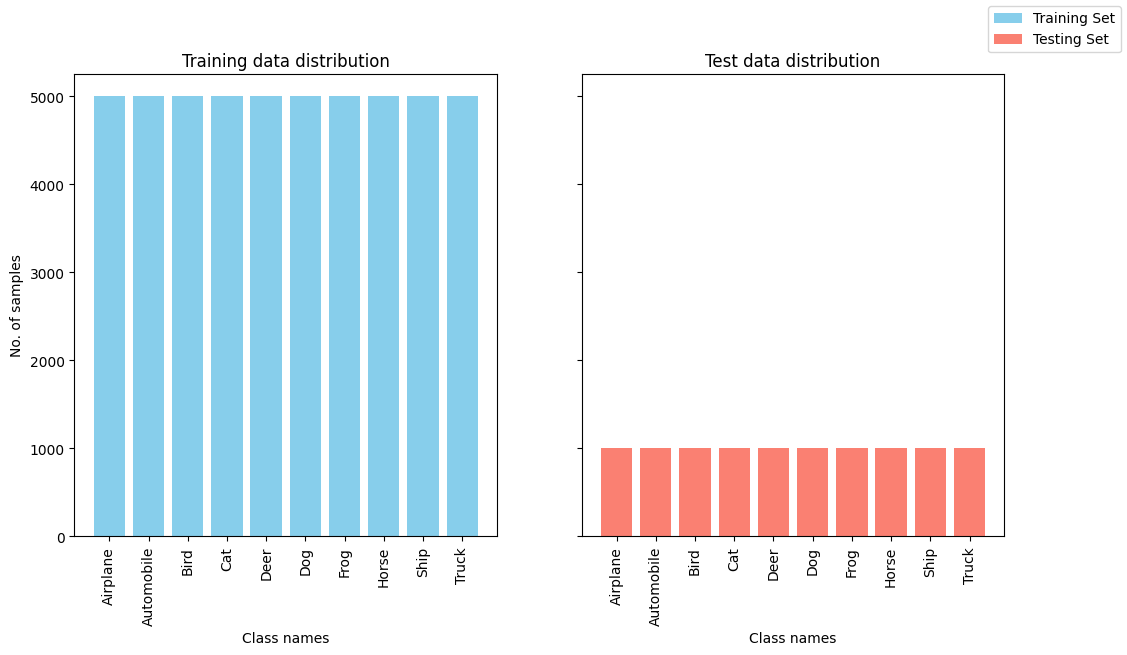

In [4]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
                'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
train_classes, train_counts = np.unique(y_train, return_counts=True)
test_classes, test_counts = np.unique(y_test, return_counts=True)
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot training set distribution
axs[0].bar(class_names, train_counts, color='skyblue')
axs[0].set_title('Training data distribution')
axs[0].set_xlabel('Class names')
axs[0].set_ylabel('No. of samples')
axs[0].set_xticklabels(class_names, rotation = 90)
# Plot testing set distribution
axs[1].bar(class_names, test_counts, color='salmon')
axs[1].set_title('Test data distribution')
axs[1].set_xlabel('Class names')

# Add a legend to clarify the colors represent training and testing sets
fig.legend(['Training Set', 'Testing Set'])

# plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

y_cat_train = to_categorical(y_train, 10)    # Convert the labels from 0-9 to one hot encoded 10-dimensional vectors
y_cat_test = to_categorical(y_test, 10)      # Convert the labels from 0-9 to one hot encoded 10-dimensional vectors

x_train1, x_valid, y_train1, y_valid= train_test_split(X_train, y_cat_train, test_size=0.2, random_state=22)


# Data augementation: Create a data augmentation function for the training and validation sets. During each iteration of training,
# the function will be applied randomly to batch of images to create diverse scenarios throughout the training

train_datagen = ImageDataGenerator(    #standard augmentation
                    rotation_range=10,
                    rescale=1./255,
                    zoom_range=0.1,
                    fill_mode='nearest',
                    horizontal_flip=True,
                    width_shift_range=0.1,
                    height_shift_range=0.1
                    )
valid_datagen = ImageDataGenerator(    #standard augmentation
                    rotation_range=10,
                    rescale=1./255,
                    zoom_range=0.1,
                    fill_mode='nearest',
                    horizontal_flip=True,
                    width_shift_range=0.1,
                    height_shift_range=0.21
                    )

#Data augmentation is not required, only normalization of the pixel values are required during the testing phase

test_datagen = ImageDataGenerator(rescale=1./255)


# # One-Hot Encoding
# y_cat_train = to_categorical(y_train1, 10)
# y_cat_valid = to_categorical(y_valid, 10)
# y_cat_test = to_categorical(y_test, 10)

In [17]:
#Another Version of model devlopment using the above conecpts

num_classes=10

#Compact model version
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=1, padding='same', input_shape=(32, 32, 3), kernel_initializer='he_normal', activation='relu' ))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), strides=1, padding='same', kernel_initializer='he_normal', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])  #Use the optimizer that is defined: optimizer=sgd

model.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_30          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 289,578 (1.10 MB)

 Trainable params: 288,938 (1.10 MB)

 Non-trainable params: 640 (2.50 KB)

In [18]:

earlystopper = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', verbose=1)
# ## Parameter Configuration

# monitor='val_accuracy': The callback tracks the model's accuracy on the validation dataset.

# patience=5: Training will continue for 5 epochs after the validation accuracy stops improving. If no improvement occurs during these 5 epochs, the training process will terminate.

# mode='max': Indicates that improvements are recognized when the monitored metric (validation accuracy) increases. This makes sense for accuracy monitoring, as higher accuracy values are better.

# verbose=1: Enables progress messages that inform when training stops due to early stopping.

# ## Benefits

# Early stopping provides several key advantages:

# - Prevents overfitting by halting training when the model stops improving on validation data.
# - Conserves computational resources by avoiding unnecessary training epochs.
# - Enhances the model's ability to generalize to unseen data.
# - Automatically saves the best model weights during training when used with appropriate configuration.

# ## Example Usage

# ```python
# model.fit(x_train, y_train,
#           epochs=100,
#           validation_data=(x_val, y_val),
#           callbacks=[earlystopper])
# ```

# This setup will automatically stop training when the validation accuracy plateaus, helping to find the optimal point between underfitting and overfitting.


In [19]:
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5,
                                    verbose=1, mode='max', min_lr=0.00001)

# ## Parameter Configuration

# monitor='val_accuracy': Tracks the validation accuracy to determine when to adjust the learning rate.

# factor=0.5: When triggered, the learning rate is reduced by half (multiplied by 0.5).

# patience=5: Waits for 5 epochs without improvement before reducing the learning rate.

# verbose=1: Prints messages when the learning rate changes.

# mode='max': Specifies that improvement means higher values of the monitored metric.

# min_lr=0.00001: Sets the lower bound for the learning rate to prevent it from becoming too small.

# ## How It Works

# ```python
# # Example usage with model training
# model.fit(x_train, y_train,
#           epochs=100,
#           validation_data=(x_val, y_val),
#           callbacks=[reduce_lr])
# ```

# ## Advantages

# - Adaptive Learning: Automatically adjusts the learning rate when training plateaus, helping overcome local minima.
# - Training Stability: Smaller learning rates help fine-tune the model in later stages of training.
# - Better Convergence: Reduces oscillations around the optimal point by decreasing step sizes.
# - Automation: Eliminates the need for manual learning rate scheduling.

# ## Practical Impact

# When the model's performance plateaus, reducing the learning rate allows for:
# - More precise weight updates
# - Exploration of finer features in the data
# - Better final model accuracy
# - Smoother convergence to the optimal solution

# This callback is particularly useful in deep learning models where finding the right learning rate schedule can be challenging.

In [ ]:

sgd = SGD(learning_rate=0.01, momentum=0.9, weight_decay=1e-5, nesterov=False)

#momentum=0.9

#     Extensively tested in research literature
#     Provides optimal balance between:
#         Speed of convergence
#         Training stability
#         Escape from local minima
#     Works well across different architectures and datasets
#     Changing it often degrades performance

# weight_decay=1e-5

#     Proven effective for most CNN architectures
#     Provides sufficient regularization without being too aggressive
#     Scale-appropriate for modern neural networks
#     Higher values often lead to underfitting
#     Lower values may not provide enough regularization

# nesterov=False

#     Classical momentum is more stable and reliable
#     Nesterov momentum is more sensitive to hyperparameters
#     Additional complexity of Nesterov rarely provides significant benefits
#     Classical momentum has better empirical results across various tasks

# These parameters have been extensively studied and optimized through years of deep learning research, making them reliable defaults for most applications.

In [20]:

# ## Code Components

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    0.01,           #initial_learning_rate
    20,             #decay_steps,
    alpha=0.0,
    name=None,
    warmup_target=None,
    warmup_steps=0
)
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, weight_decay=1e-5, nesterov=False)


# ## Learning Rate Schedule Parameters

# Initial Configuration:
# - Starting learning rate is set to 0.01, which defines the maximum learning rate at the beginning
# - The learning rate will decay over 20 steps, controlling the speed of decay
# - Alpha is set to 0.0, meaning the learning rate will decay completely to zero

# Decay Pattern:
# The learning rate follows a cosine curve that gradually decreases from the initial value (0.01) to alpha*initial_value (0 in this case). The decay is calculated as:

# lr = 0.01 * (0.5 * (1 + cos(pi * step / 20)))

# ## SGD Optimizer Settings

# Configuration Details:
# - Momentum of 0.9 helps accelerate gradient descent
# - Weight decay of 1e-5 provides regularization
# - Nesterov momentum is disabled

# ## Use Cases

# This configuration is particularly effective for:

# - Training deep neural networks where you want to start with larger learning steps and gradually refine the learning
# - Scenarios requiring careful convergence near the end of training
# - Models that benefit from a smooth learning rate transition rather than step-wise decay

# ## Advantages

# - The cosine decay provides smoother transitions compared to step decay
# - The schedule automatically handles learning rate reduction without manual intervention
# - The combination with SGD optimizer makes it suitable for various deep learning tasks


In [ ]:

filepath="/content/drive/MyDrive/Colab Notebooks/TimesPro/checkpoint.model_GAP.{epoch:02d}.keras"              #  checkpoint saving the whole model (default)
filepath="/content/drive/MyDrive/Colab Notebooks/TimesPro/checkpoint.model_GAP.{epoch:02d}.weights.h5"         # when save_weights_only=True

modelcheckpoint= ModelCheckpoint(filepath=filepath, save_weights_only=True,
                                 monitor='val_accuracy', mode='max', save_best_only=True)

callbacks=[earlystopper, reduce_lr, modelcheckpoint]


history = model.fit(
    train_datagen.flow(x_train1, y_train1, batch_size=32),
    validation_data=valid_datagen.flow(x_valid, y_valid, batch_size=32),
    epochs=20,                                       # Set a high number of epochs
    callbacks=callbacks)                               # Include the early stopping callback


#Train the model and evaluate

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.4407 - loss: 1.5354 - val_accuracy: 0.4871 - val_loss: 1.4027 - learning_rate: 0.0100
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.5807 - loss: 1.1658 - val_accuracy: 0.5641 - val_loss: 1.2494 - learning_rate: 0.0100
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.6388 - loss: 1.0151 - val_accuracy: 0.6630 - val_loss: 0.9373 - learning_rate: 0.0100
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.6781 - loss: 0.9120 - val_accuracy: 0.6848 - val_loss: 0.8857 - learning_rate: 0.0100
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 45s 36ms/step - accuracy: 0.7046 - loss: 0.8400 - val_accuracy: 0.7030 - val_loss: 0.8481 - learning_rate: 0.0100
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 49ms/step - accuracy: 0.7248 - loss: 0.7919 - val_accuracy: 0.7178 - val_loss: 0.8096 - learning_rate: 0.0100
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 96s 77ms/step - accura

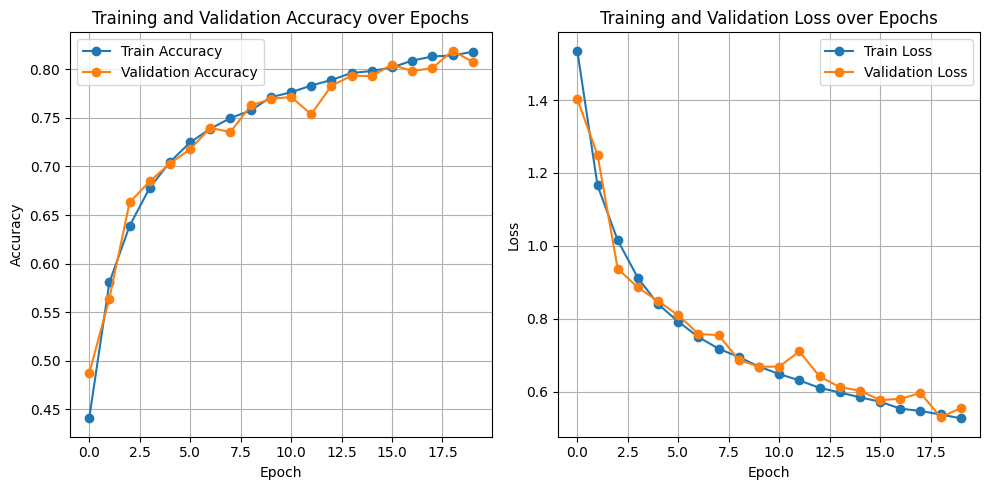

Accuracy: 83.91%


In [22]:
def plot_convergence():

  plt.figure(figsize=(10, 5))
  # Accuracy plot
  plt.subplot(1, 2, 1)
  plt.plot(history.history['accuracy'], marker='o', label='Train Accuracy')
  plt.plot(history.history['val_accuracy'], marker='o', label='Validation Accuracy')
  plt.title('Training and Validation Accuracy over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.grid(True)
  plt.legend()

  # Loss plot
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'], marker='o', label='Train Loss')
  plt.plot(history.history['val_loss'], marker='o', label='Validation Loss')
  plt.title('Training and Validation Loss over Epochs')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.grid(True)
  plt.legend()

  plt.tight_layout()
  plt.show()


plot_convergence()


scores = model.evaluate(test_datagen.flow(X_test, y_cat_test,batch_size=32), verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))